In [31]:
import numpy as np
import pandas as pd
myData = pd.read_csv('../data/breast-cancer-wisconsin-data.csv')
print(myData.shape)

(569, 33)


In [32]:
peek = myData.head(10)
print(peek)

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0    842302         M        17.99         10.38          122.80     1001.0            0.118   
1    842517         M        20.57         17.77          132.90     1326.0            0.085   
2  84300903         M        19.69         21.25          130.00     1203.0            0.110   
3  84348301         M        11.42         20.38           77.58      386.1            0.142   
4  84358402         M        20.29         14.34          135.10     1297.0            0.100   
5    843786         M        12.45         15.70           82.57      477.1            0.128   
6    844359         M        18.25         19.98          119.60     1040.0            0.095   
7  84458202         M        13.71         20.83           90.20      577.9            0.119   
8    844981         M        13.00         21.82           87.50      519.8            0.127   
9  84501001         M        12.46      

In [33]:
shape = myData.shape
print(shape)

(569, 33)


In [34]:
types = myData.dtypes
print(types)

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [35]:
outcome_counts = myData.groupby('diagnosis').size()
print(outcome_counts)

diagnosis
B    357
M    212
dtype: int64


In [36]:
from pandas import set_option

set_option('display.width', 100)
set_option('precision', 3)
correlations = myData.corr(method = 'pearson')
print(correlations)

                                id  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                       1.000e+00        0.075         0.100           0.073      0.097   
radius_mean              7.463e-02        1.000         0.324           0.998      0.987   
texture_mean             9.977e-02        0.324         1.000           0.330      0.321   
perimeter_mean           7.316e-02        0.998         0.330           1.000      0.987   
area_mean                9.689e-02        0.987         0.321           0.987      1.000   
smoothness_mean         -1.297e-02        0.171        -0.023           0.207      0.177   
compactness_mean         9.570e-05        0.506         0.237           0.557      0.499   
concavity_mean           5.008e-02        0.677         0.302           0.716      0.686   
concave points_mean      4.416e-02        0.823         0.293           0.851      0.823   
symmetry_mean           -2.211e-02        0.148         0.071           0.183   

<AxesSubplot:ylabel='Frequency'>

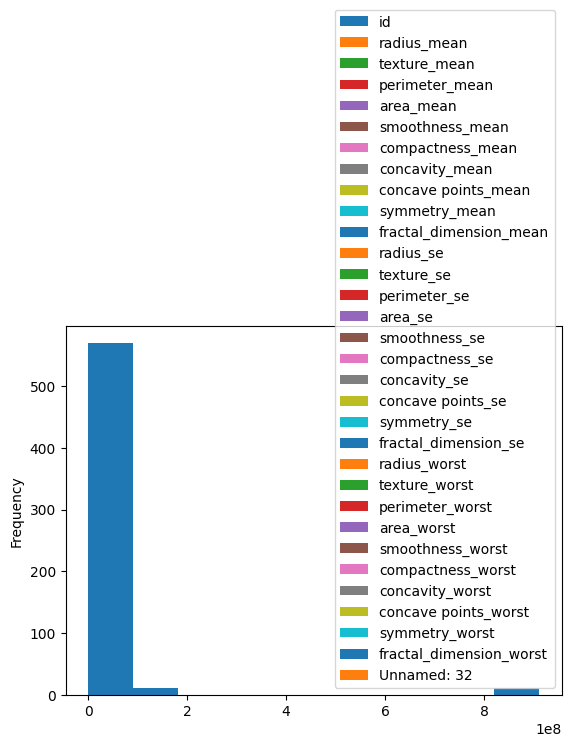

In [37]:
import matplotlib.pyplot as plt
myData.plot.hist()

In [38]:
myData.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize = (10,10))
plt.show()

ValueError: Layout of 3x3 must be larger than required size 32

<Figure size 1000x1000 with 0 Axes>

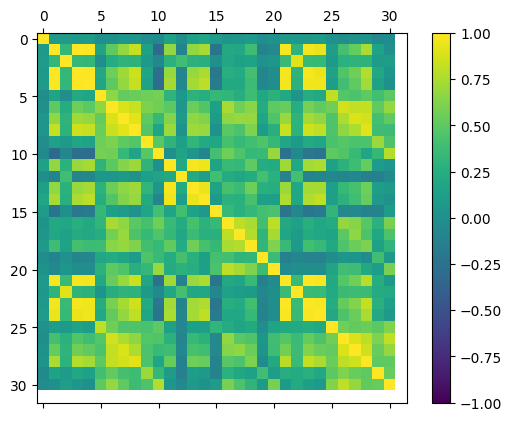

In [39]:
correlations = myData.corr()
# plot correlation matrix
myfig = plt.figure()
axis = myfig.add_subplot(111) # There is only one subplot or graph;
# "111" means "1x1 grid, first subplot"
cax = axis.matshow(correlations, vmin = -1, vmax = 1)
myfig.colorbar(cax)
ticks = np.arange(0, 9, 1)

In [44]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from numpy import set_printoptions

label_encoder = LabelEncoder()

categorical_columns = ['diagnosis']

for col in categorical_columns:
    myData[col] = label_encoder.fit_transform(myData[col])

In [45]:
X = myData.drop('diagnosis', axis=1).values
Y = myData['diagnosis'].values

mydataScaler = MinMaxScaler(feature_range=(0, 1))
mydataRescaled = mydataScaler.fit_transform(X)

set_printoptions(precision=3)
print(mydataRescaled[20:25, :])

ValueError: Found array with 0 sample(s) (shape=(0, 32)) while a minimum of 1 is required by MinMaxScaler.

In [46]:
from sklearn.preprocessing import LabelEncoder, Normalizer

myData.replace([np.inf, -np.inf], np.nan, inplace=True)
myData.dropna(inplace=True)

mydata_train = myData.drop('diagnosis', axis=1).values
mydata_label = myData['diagnosis'].values

mydataScaler = Normalizer().fit(mydata_train)
mydataNormalized = mydataScaler.transform(mydata_train)

set_printoptions(precision=3)
print(mydataNormalized[20:25, :])

ValueError: Found array with 0 sample(s) (shape=(0, 32)) while a minimum of 1 is required.

In [47]:
from sklearn.preprocessing import Binarizer

mydataBinarizer = Binarizer(threshold=0.0).fit(mydata_train)
mydatabinarized = mydataBinarizer.transform(mydata_train)
set_printoptions(precision = 3)
print(mydatabinarized[0:5,:])

ValueError: Found array with 0 sample(s) (shape=(0, 32)) while a minimum of 1 is required.

In [49]:
from sklearn.feature_selection import SelectKBest, f_regression

myData.replace([np.inf, -np.inf], np.nan, inplace=True)
myData.dropna(inplace=True)

min_value = myData.drop('diagnosis', axis=1).min().min()
if min_value < 0:
    myData += abs(min_value)

mydata_train = myData.drop('diagnosis', axis=1).values
mydata_label = myData['diagnosis'].values

myFeature = SelectKBest(score_func=f_regression, k=4)
fit = myFeature.fit(mydata_train, mydata_label)

set_printoptions(precision=3)
print(fit.scores_)

ValueError: Found array with 0 sample(s) (shape=(0, 32)) while a minimum of 1 is required.

In [50]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
mydataRFE = RFE(model, n_features_to_select=4)
mydataFit = mydataRFE.fit(mydata_train, mydata_label)

print("Number of features selected: %d" % mydataFit.n_features_)
print("Selected features are denoted by True: %s" % mydataFit.support_)
print("Feature Ranking: %s" % mydataFit.ranking_)

ValueError: Found array with 0 sample(s) (shape=(0, 32)) while a minimum of 1 is required.

In [51]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
fit = pca.fit(mydata_train)
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

ValueError: Found array with 0 sample(s) (shape=(0, 32)) while a minimum of 1 is required.

In [52]:
pca=PCA(0.92)
selectedFeatures = pca.fit_transform(mydata_train)
print (selectedFeatures.shape)

ValueError: Found array with 0 sample(s) (shape=(0, 32)) while a minimum of 1 is required.

In [53]:
pca=PCA(0.98)
selectedFeatures=pca.fit_transform(mydata_train)
print (selectedFeatures.shape)

ValueError: Found array with 0 sample(s) (shape=(0, 32)) while a minimum of 1 is required.

In [54]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier

myData['num'] = pd.cut(myData['diagnosis'], bins=3, labels=[0, 1, 2])
mydata_label = myData['diagnosis'].values

model = ExtraTreesClassifier()
model.fit(mydata_train, mydata_label)
print(model.feature_importances_)

ValueError: Cannot cut empty array